<a href="https://colab.research.google.com/github/sahilmurti07/ML_Projects/blob/main/ML(Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORTING ALL IMPORTANT LIBRARIES**

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [85]:
# model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## IMPORT DATA FILE

In [86]:
df = pd.read_csv("/content/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# DATA CLEANING

In [87]:
df.drop(['area_type', 'availability','society','balcony'],axis=1)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [88]:
df.drop_duplicates()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [89]:
df = df.dropna()

In [90]:
df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
society,0
total_sqft,0
bath,0
balcony,0
price,0


In [91]:
df.describe()

,bath,balcony,price
count,7496.000000,7496.000000,7496.000000
mean,2.458378,1.629936,96.857122
std,0.881128,0.780127,105.382490
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,49.500000
50%,2.000000,2.000000,69.755000
75%,3.000000,2.000000,105.000000
max,9.000000,3.000000,2700.000000


In [92]:
df["bhk"] = df['size'].apply(lambda x: int(x.split(" ")[0]))
df = df.drop("size",axis=1)

In [93]:
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,DuenaTa,1170,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,Prrry M,2785,5.0,3.0,295.00,4


In [94]:
df['total_sqft'].unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

CONVERTING INTO PURE SQFT


In [95]:
def convert_sqft(x):
  try:
    tk = x.split("-")
    if len(tk)==2:
      return float((tk[0])+float(tk[1]))/2
    return float(x)
  except:
    return None

In [96]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft)
df = df.dropna(subset=['total_sqft'])

In [97]:
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,DuenaTa,1170.0,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,Prrry M,2785.0,5.0,3.0,295.00,4


In [98]:
df["price-per-sqft"]=df["price"]*100000/df["total_sqft"]

In [99]:
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,price-per-sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Ready To Move,Whitefield,DuenaTa,1170.0,2.0,1.0,38.00,2,3247.863248
11,Plot Area,Ready To Move,Whitefield,Prrry M,2785.0,5.0,3.0,295.00,4,10592.459605


REMOVE OUTLIERS


In [100]:
q1 = df['price'].quantile(0.25)
q2 = df['price'].quantile(0.75)
iqr = q2 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q2 +1.5 *iqr
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

<Axes: xlabel='total_sqft', ylabel='price'>

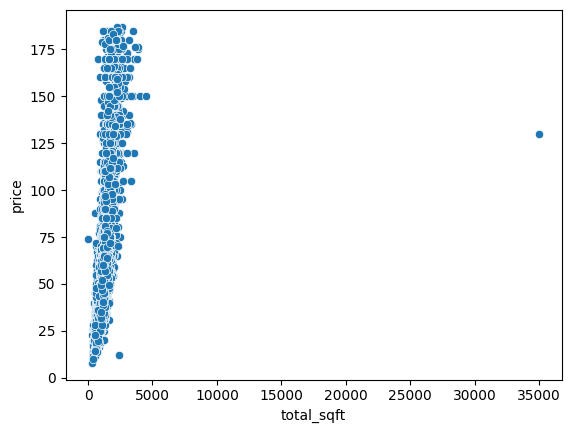

In [101]:
sns.scatterplot(x=df['total_sqft'], y=df['price'])


DATA VISUALISATION

<Axes: xlabel='bhk', ylabel='price-per-sqft'>

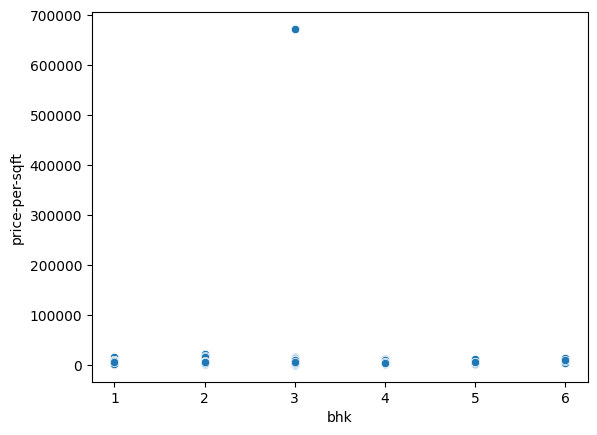

In [102]:
 sns.scatterplot(x = df["bhk"],y=df["price-per-sqft"])

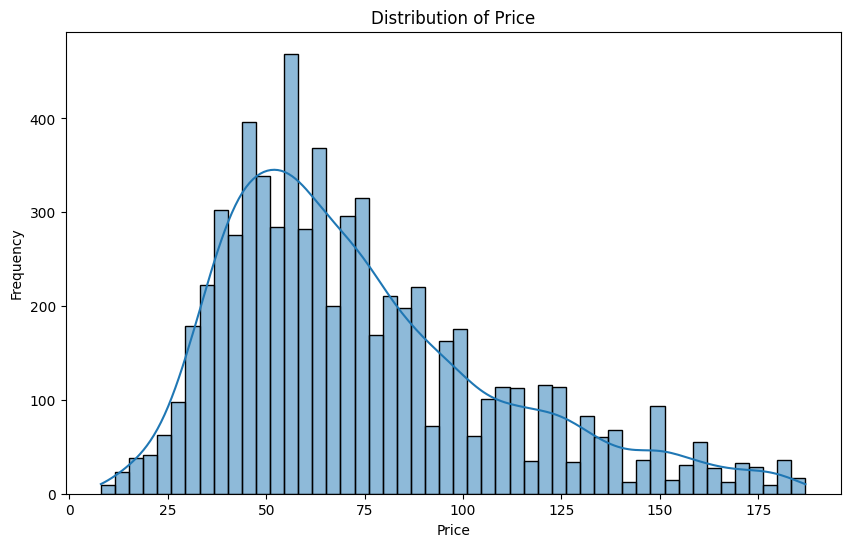

In [103]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

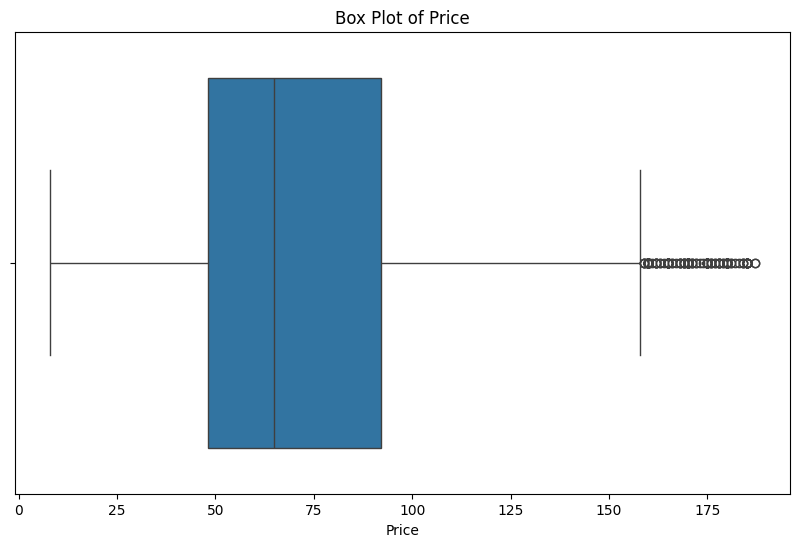

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6715 entries, 0 to 13317
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       6715 non-null   object 
 1   availability    6715 non-null   object 
 2   location        6715 non-null   object 
 3   society         6715 non-null   object 
 4   total_sqft      6715 non-null   float64
 5   bath            6715 non-null   float64
 6   balcony         6715 non-null   float64
 7   price           6715 non-null   float64
 8   bhk             6715 non-null   int64  
 9   price-per-sqft  6715 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 577.1+ KB


In [106]:
x = df[["bhk","price-per-sqft","bath","balcony","total_sqft"]]
y = df['price']

In [107]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [108]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [109]:
lr_pred = lr.predict(X_test)

In [110]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("RMSE :", np.sqrt(mean_squared_error(y_test,lr_pred)))
print("R2 :" , r2_score(y_test,lr_pred))
print("MAE:" ,mean_absolute_error(y_test,lr_pred))

RMSE : 62.25492480641018
R2 : -2.2997219372257685
MAE: 16.36505372253943


In [111]:
lasso = Lasso()
lasso.fit(X_train,y_train)
ls_pred = lasso.predict(X_test)

In [112]:
print("RMSE :", np.sqrt(mean_squared_error(y_test,ls_pred)))
print("R2 :" , r2_score(y_test,ls_pred))
print("MAE:" ,mean_absolute_error(y_test,ls_pred))

RMSE : 64.79455531224662
R2 : -2.5744312267297365
MAE: 16.762499142449695


In [113]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
fr_pred = rf.predict(X_test)

In [114]:
print("RMSE :", np.sqrt(mean_squared_error(y_test,fr_pred )))
print("R2 :" , r2_score(y_test,fr_pred ))
print("MAE:" ,mean_absolute_error(y_test,fr_pred ))

RMSE : 1.6688495063396598
R2 : 0.9976288213964106
MAE: 0.46992725241995625


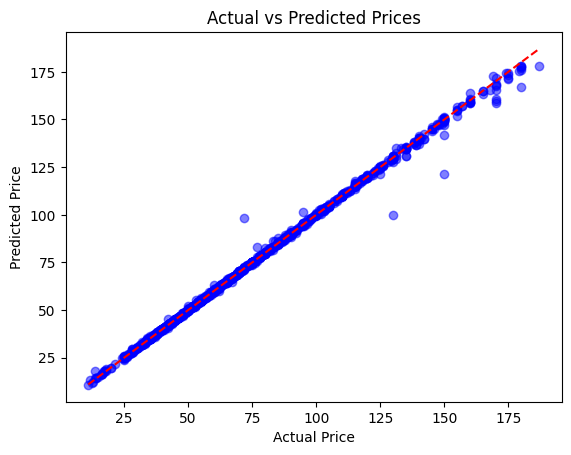

In [115]:
import matplotlib.pyplot as plt

plt.scatter(y_test, fr_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
